<a href="https://colab.research.google.com/github/notiona/dacon_know/blob/main/hyobae/mlp_with_data_0112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd drive/MyDrive/Dacon/dacon_know
%cd hyobae
%pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Dacon/dacon_know
/content/drive/MyDrive/Dacon/dacon_know/hyobae


'/content/drive/MyDrive/Dacon/dacon_know/hyobae'

In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob
from tqdm import tqdm
import warnings

RANDOM_STATE = 42
np.seed = 42
DATA_PATH = "../data_0112/"

warnings.filterwarnings(action='ignore')
PATH_2017 = DATA_PATH + "train/KNOW_2017.csv"
PATH_2018 = DATA_PATH + "train/KNOW_2018.csv"
PATH_2019 = DATA_PATH + "train/KNOW_2019.csv"
PATH_2020 = DATA_PATH + "train/KNOW_2020.csv"

paths = [PATH_2017, PATH_2018, PATH_2019, PATH_2020]

know_train = [pd.read_csv(path) for path in paths]

# Preprocess

In [3]:
know_train[0]

,idx,aq1_1,aq1_2,aq2_1,aq2_2,aq3_1,aq3_2,aq4_1,aq4_2,aq5_1,aq5_2,aq6_1,aq6_2,aq7_1,aq7_2,aq8_1,aq8_2,aq9_1,aq9_2,aq10_1,aq10_2,aq11_1,aq11_2,aq12_1,aq12_2,aq13_1,aq13_2,aq14_1,aq14_2,aq15_1,aq15_2,aq16_1,aq16_2,aq17_1,aq17_2,aq18_1,aq18_2,aq19_1,aq19_2,aq20_1,...,간호사,변동,망치,검사,직무교육,작업,프로그램,선호,자영업,실무교육,단기,컴퓨터,설비,인원,워드,전기기사,인공,개발,인터넷,볼펜,시장,일러스트,측정기,상품,거절,디자인,관리,분석,상태,의료,한글,교재,시스템,회사원,이용,노트북,생산,것이므,ubda_cnt,knowcode
0,0,3,3,3,3,3,3,4,4,3,4,3,3,2,2,2,2,2,2,3,3,3,3,4,4,3,3,3,2,3,3,5,6,5,6,4,5,2,2,5,...,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,825101
1,1,4,5,4,5,3,4,3,4,3,4,1,0,1,0,1,0,1,0,2,3,3,4,3,4,4,5,2,2,3,4,3,4,3,4,3,4,1,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,140204
2,2,3,4,3,4,3,4,5,6,4,5,1,0,1,0,3,4,3,4,3,4,1,0,3,4,3,4,1,0,3,4,3,4,3,4,3,4,3,4,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,140204
3,3,3,3,3,3,3,5,4,5,4,6,3,5,3,4,4,5,5,5,4,5,3,4,4,5,3,5,3,4,4,4,3,4,2,2,4,4,4,2,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,140601
4,4,4,5,3,4,3,4,4,5,3,4,1,0,1,0,1,0,1,0,3,4,2,2,3,4,3,4,1,0,3,4,3,4,3,4,3,4,1,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,140204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9481,9481,3,5,2,4,3,3,2,2,2,3,2,3,3,3,2,3,2,3,3,4,4,5,4,5,3,4,2,3,3,4,2,2,2,2,2,2,3,5,1,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,411301
9482,9482,5,5,5,5,5,5,3,4,4,5,5,5,4,4,5,5,4,5,4,5,4,5,5,5,4,5,4,5,5,4,2,2,3,4,4,5,5,5,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,151105
9483,9483,3,3,4,6,3,3,4,5,4,5,3,4,3,4,1,0,2,2,3,3,3,4,3,4,3,4,3,4,3,3,5,7,5,7,4,6,1,0,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,701101
9484,9484,3,5,3,5,4,5,3,4,3,5,4,6,4,5,4,5,4,6,4,6,3,4,3,5,3,4,2,3,4,6,3,3,3,4,3,3,4,5,4,...,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,25402


In [4]:
from sklearn.preprocessing import LabelEncoder
years = ['2017', '2018', '2019', '2020']

year_encoder = {}

for year, df in zip(years, know_train):
    print(year)
    encoders = {}
    
    for col in df.columns:
        if col == 'idx':
            print("HEHE")
            continue
        if col == 'knowcode':
            print('knowcode encoding')
            encoder = LabelEncoder()
            df[col] = df[col].map(int)
            df[col] = encoder.fit_transform(df[col])
            encoders[col] = encoder

        try:
            df[col] = df[col].map(int)
        except:
            encoder = LabelEncoder()
            df[col] = df[col].map(str)
            df[col] = encoder.fit_transform(df[col])
            encoders[col] = encoder
            
            
    year_encoder[year] = encoders

2017
HEHE
knowcode encoding
2018
HEHE
knowcode encoding
2019
HEHE
knowcode encoding
2020
HEHE
knowcode encoding


In [5]:
know_train[0]['major']

0        723
1         33
2         33
3       1446
4         33
        ... 
9481     543
9482     862
9483     216
9484     384
9485    1043
Name: major, Length: 9486, dtype: int64

In [6]:
know_train[0]['knowcode']

0       461
1       133
2       133
3       144
4       133
       ... 
9481    271
9482    147
9483    410
9484     46
9485     23
Name: knowcode, Length: 9486, dtype: int64

In [7]:
know_train[0]['knowcode'].nunique()

538

# Modeling

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Train - Test Split

In [9]:
train_data, val_data = train_test_split(know_train[0], test_size=0.2, random_state=RANDOM_STATE)

X_train = np.asarray(train_data.drop(['idx','knowcode'], axis=1))
X_val = np.asarray(val_data.drop(['idx','knowcode'], axis=1))

y_train = to_categorical(np.asarray(train_data['knowcode']))
y_val = to_categorical(np.asarray(val_data['knowcode']))

In [10]:
X_train

array([[3, 4, 4, ..., 0, 0, 4],
       [1, 0, 1, ..., 0, 0, 2],
       [5, 7, 5, ..., 0, 0, 2],
       ...,
       [4, 6, 5, ..., 0, 0, 4],
       [4, 5, 5, ..., 0, 0, 2],
       [4, 4, 2, ..., 0, 0, 4]])

In [11]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
print(X_train.shape)
print(y_train.shape)

(7588, 267)
(7588, 538)


## Data Augmentation

* source: [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

In [36]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

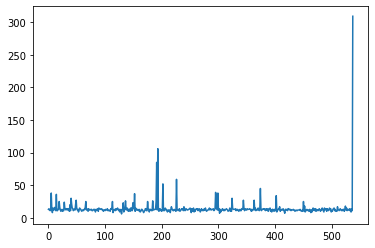

In [57]:
target_counts = y_train.sum(axis=0)
plt.plot(target_counts)
plt.show()

In [58]:
target_counts

array([ 13.,  14.,  12.,  11.,  12.,  38.,  13.,   8.,  15.,  12.,  13.,
        16.,  12.,  11.,  36.,  11.,  11.,  13.,  13.,  25.,  16.,  12.,
        10.,  12.,  13.,  10.,  12.,  11.,  24.,  14.,  14.,  12.,  14.,
        14.,  12.,  14.,  14.,  10.,  20.,  11.,  30.,  21.,  15.,  14.,
        11.,  13.,  13.,  12.,  21.,  27.,  14.,  12.,  13.,   9.,  11.,
        15.,  14.,  13.,  11.,  10.,  12.,  12.,  11.,  13.,  13.,  16.,
        25.,  12.,  14.,  12.,  10.,  14.,  12.,  12.,  12.,  13.,  13.,
        11.,  11.,  12.,  13.,  13.,  11.,   9.,  13.,  12.,  13.,  14.,
        10.,  15.,  14.,  14.,  13.,  13.,  14.,  12.,  12.,  10.,  12.,
        12.,  11.,  13.,  12.,  12.,  14.,  11.,  11.,  12.,  11.,  10.,
        14.,  13.,  16.,  25.,   8.,  11.,  12.,  13.,  11.,  14.,  12.,
        13.,  15.,  13.,  11.,  13.,   9.,  11.,  13.,   6.,  12.,  13.,
        23.,   9.,  11.,  14.,  26.,  13.,  12.,  15.,  13.,  10.,  13.,
        13.,  10.,  15.,  11.,  15.,  11.,  23.,  1

In [ ]:
resample_dict = {}
sample_num = 60
for i, num in enumerate(target_counts):
    resample_dict[i] = max(int(num), sample_num)

In [61]:
smote = SMOTE(sampling_strategy=resample_dict, random_state=RANDOM_STATE)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

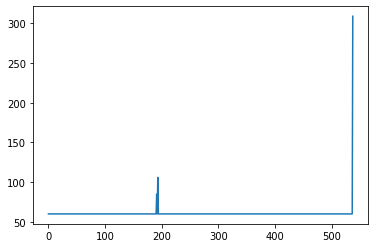

In [62]:
target_counts = y_train_resampled.sum(axis=0)
plt.plot(target_counts)
plt.show()

In [63]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(32600, 267)
(32600, 538)


## Build model and train

In [65]:
model = Sequential()

model.add(Flatten(input_shape=[267]))
model.add(Dense(320, activation='relu'))
# model.add(Dropout(0.5, seed=RANDOM_STATE))
model.add(Dense(538, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 267)               0         
                                                                 
 dense_13 (Dense)            (None, 320)               85760     
                                                                 
 dense_14 (Dense)            (None, 538)               172698    
                                                                 
Total params: 258,458
Trainable params: 258,458
Non-trainable params: 0
_________________________________________________________________


In [66]:
history = model.fit(X_train_resampled, y_train_resampled, epochs=30,
                    validation_data=(X_val, y_val))

Epoch 1/30
1019/1019 [==============================] - 5s 5ms/step - loss: 35.8274 - acc: 0.0099 - val_loss: 12.2713 - val_acc: 0.0105
Epoch 2/30
1019/1019 [==============================] - 5s 5ms/step - loss: 6.3872 - acc: 0.0178 - val_loss: 9.6707 - val_acc: 0.0269
Epoch 3/30
1019/1019 [==============================] - 5s 5ms/step - loss: 5.9222 - acc: 0.0214 - val_loss: 9.2169 - val_acc: 0.0321
Epoch 4/30
1019/1019 [==============================] - 5s 5ms/step - loss: 5.6657 - acc: 0.0249 - val_loss: 9.1621 - val_acc: 0.0358
Epoch 5/30
1019/1019 [==============================] - 5s 5ms/step - loss: 5.5535 - acc: 0.0287 - val_loss: 10.3236 - val_acc: 0.0311
Epoch 6/30
1019/1019 [==============================] - 5s 5ms/step - loss: 5.4102 - acc: 0.0341 - val_loss: 8.0518 - val_acc: 0.0400
Epoch 7/30
1019/1019 [==============================] - 5s 5ms/step - loss: 5.2857 - acc: 0.0376 - val_loss: 8.8774 - val_acc: 0.0342
Epoch 8/30
1019/1019 [==============================] - 5s 

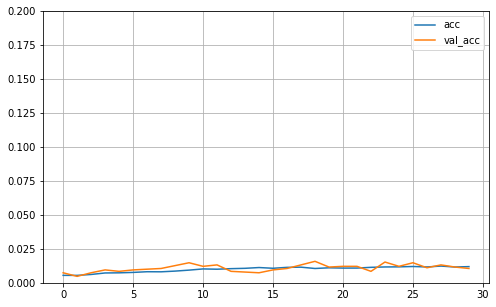

In [43]:
pd.DataFrame(history.history)[['acc', 'val_acc']].plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 0.2)
plt.show()

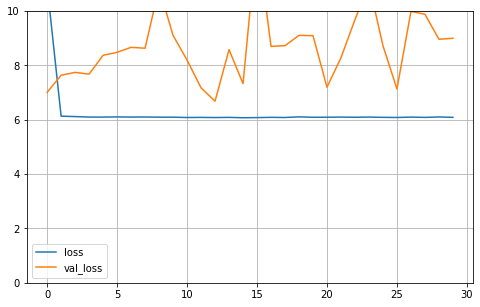

In [44]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 10)
plt.show()

In [45]:
model = Sequential()

model.add(Flatten(input_shape=[267]))
model.add(Dense(320, activation='relu'))
model.add(Dropout(0.2, seed=RANDOM_STATE))
model.add(Dense(538, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 267)               0         
                                                                 
 dense_9 (Dense)             (None, 320)               85760     
                                                                 
 dropout_4 (Dropout)         (None, 320)               0         
                                                                 
 dense_10 (Dense)            (None, 538)               172698    
                                                                 
Total params: 258,458
Trainable params: 258,458
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_val, y_val))

Epoch 1/30
238/238 [==============================] - 2s 7ms/step - loss: 122.7494 - acc: 0.0127 - val_loss: 14.2584 - val_acc: 0.0369
Epoch 2/30
238/238 [==============================] - 1s 6ms/step - loss: 10.1128 - acc: 0.0372 - val_loss: 8.1273 - val_acc: 0.0374
Epoch 3/30
238/238 [==============================] - 1s 6ms/step - loss: 6.5955 - acc: 0.0398 - val_loss: 7.7353 - val_acc: 0.0400
Epoch 4/30
238/238 [==============================] - 1s 6ms/step - loss: 6.3968 - acc: 0.0419 - val_loss: 7.6578 - val_acc: 0.0411
Epoch 5/30
238/238 [==============================] - 1s 6ms/step - loss: 6.3014 - acc: 0.0432 - val_loss: 7.8174 - val_acc: 0.0400
Epoch 6/30
238/238 [==============================] - 1s 6ms/step - loss: 6.2518 - acc: 0.0427 - val_loss: 7.5099 - val_acc: 0.0395
Epoch 7/30
238/238 [==============================] - 1s 6ms/step - loss: 6.2024 - acc: 0.0426 - val_loss: 7.5911 - val_acc: 0.0390
Epoch 8/30
238/238 [==============================] - 1s 6ms/step - loss

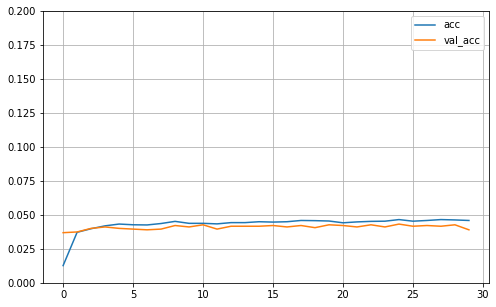

In [47]:
pd.DataFrame(history.history)[['acc', 'val_acc']].plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 0.2)
plt.show()

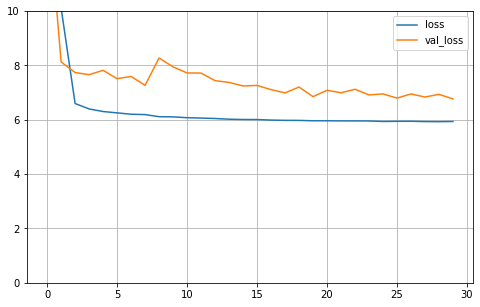

In [48]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 10)
plt.show()